# Time series Forecasting in Power BI
> Time series forecasting in PowerBI. (An Almost) Comprehensive Guide

- toc: true 
- badges: true
- comments: true
- categories: [forecasting,Python,powerbi,forecasting_in_powerbi]
- hide: false

## Overview

In [Part 1](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/2020/04/21/timeseries-part1.html) I covered the exploratory data analysis of a time series using Python & R and in [Part 2](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/fbprophet/ensemble_forecast/uncertainty/simulation/2020/04/21/timeseries-part2.html) I created various forecasting models, explained their differences and finally talked about forecast uncertainty. In this post, I hope to provide a definitive guide to forecasting in Power BI. I wanted to write about this because forecasting is critical for any business and the documentation on this is very thin, and it's easy to (mis)use it.

If you do not have experience in forecasting, I would encourage you to read the above two blogs to learn more about forecasting in general.

I will use the [same dataset](https://github.com/pawarbi/datasets/blob/master/timeseries/ts_frenchretail.csv) I used in the earlier blog posts and compare the Power BI forecast with the Python models I created. 


#### How to create a forecast in PowerBI?

It's very easy! [Parker Stevens](https://twitter.com/powerbielite) gives a nice overview of it in the clip below.


>youtube:  https://youtu.be/fLqvaWJtwhQ

To create a forecast you need:

  - A continuous date column
  - A numerical column with the numbers you want to forecast

    1. Drag and drop the dates in "Axis" field
    2. Drag and drop the numbers in the 'Values' field 
    3. Click on the down arrow in the 'Date' field and apply the required hierarchy (month, quarter, week etc.) or remove 'Date Hierarchy' if you do not want hierarchy. If removed, it will plot the data for each date rather than the hierarchy.
    4. In the Format options, make sure the X Axis type is 'Continuous' 
    5. Go to 'Analytics' pane, Forecast > +Add > Enter the Forecast Length

That's it ! We have a forecast. You can hover over the line chart to get the forecast predictions along with confidence interval. Very easy.

*But* how do we know: 

   - if the forecast is accurate
   - What model(s) was used to create the forecast?
   - what assumptions were made to make the forecast?
   - what's the forecast uncertainty?
   - how do we display the forecasts?
   - what are the limitations?
   - can we improve the forecast?
   - when is it appropriate or no appropriate to use it?
   
Let's first take a look at the documentation from the Power BI team and see if we can aswer some of these questions. 

##### How does Power BI create the forecast?

I found couple of official blog posts on Power BI's website that were written in [2014](https://perma.cc/L8CN-GRUA) and [2016](https://community.powerbi.com/t5/Community-Blog/Predict-your-milestones-with-forecasting-in-Power-BI-Desktop/ba-p/81687). The blog written in 2014 was for Power View which has been deprecated but the post still shows up under Power BI's blog. Other than that, I couldn't find anything. Given the lack of information, I will assume these posts still describe the current forecasting procedure in Power BI. I will use Python to follw the same procedure and see if we can understand it better. 

 


**Which forecasting model is used?**

According to this blog, Power BI uses the ETS(AAA) and ETS(AAN) models to model seasonal and non-seasonal data, respectively. I used and described these models in [Part 2](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/fbprophet/ensemble_forecast/uncertainty/simulation/2020/04/21/timeseries-part2.html). But here is a quick non-mathematical recap:
           
  - ETS stands for **E**rror, **T**rend, **S**easonality. It is an exponential smoothing model which gives exponential weightage to the historical data to predict the future values. 
  - The data is first decomposed into level, trend, and seasonality. Error is obtained by subtracting the level, trend and and seasonality from the actual values.
  - **Level** is the average value over the observed period
  - **Trend** is the change in level over this period
  - **Seasonality** is the behaviour of the observed quantity from one season to next. e.g. if you have a monthly data for toy sales, sales would be up around holidays from Nov-Jan and then down in the following months.   
  - It's called exponential smoothing because exponential weights are applied to successive historical values.
  - Trend, Seasonality and the Error terms can be combined in additive, multiplicative or mixed fashion.   
  
           Additive = (Level+Trend) + Seasonality + Error
   
   
          Multiplicative = (Level * Trend) * Seasonality * Error
          
   - In addition, the Trend component can be "Damped". i.e. we 'derate' the growth of the trend
   
   
   - The ETS models follow ETS(XYZ) nomenclature:   
   
     - **X**: Error Term. It can be Additive (A), Multiplicative (M)
      
     - **Y**: Trend Term. It can Additive (A), Multiplicative (M) or Damped (Ad), or No trend (N) 
      
     - **Z**: Seasonality. Additive (A) or Multiplicative(M), or No seasonality (N)
      
   
   - As the illustration below shows, if the trend is linear, it's "additive". If it shows exponential growth, multiplicative model would fit better. 
   - Similarly, if the quantity being studied varies in a stable way relative to average levels, seasonality can be modeled as "additive". If the change from one season to next, relative to average, can be expressed in terms of % of average, then "multiplicative" model would be a better fit. Read Part 2 to get better understanding of this. There are 36 possible combinations depending on A,M,Ad,N. Only some of these are practical.   
   
   - Out of 15 or so possible practical ETS models, Power BI uses two models ETS(AAN), ETS(AAA). You can read more about ETS [here](https://otexts.com/fpp2/ets.html)
   - In general, ETS often provides the most accurate forecasts, even better than the complex neural network models [Ref](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194889)


![ETS](https://raw.githubusercontent.com/pawarbi/blog/master/images/pbi1.JPG)

###### ETS(AAN) 

 - This is "Additive" error, "Additive" trend and "No" seasonality model used when there is no seasonality in the time series. If you are familiar with Holt-Winter's exponential models, this is Holt's linear model. 
 - You would use this model when you see a linear trend in the data and no seasonality pattern.
 - If you are familiar with ARIMA models, this is equivalent to ARIMA(0,2,2)
 - This is not single exponential smoothing (SES). SES (i.e ETS(ANN)) is used  when the data doesn't have any trend either.
 - See an example below. It shows Google's stock performance over time. It has a positive trend but no seasonality. The forecast with an ETS (AAN) model is just a straight line that extends the trend into the future. 
 
 ![Google Stock](http://uc-r.github.io/public/images/analytics/time_series/es6-1.png "http://uc-r.github.io/ts_exp_smoothing")

##### ETS(AAA)

- This model should be used when there is linear trend and seasonality. 
- This is the Holt-Winter's triple exponential smoothing model
- See the example below. This data shows quarterly milk production. It has an obvious positive, linear trend and seasonality. Notice how the production jumps up in certain quarters of the year and then drops in following seasons. the height of the peaks in seasons remains same relative to the trend. "Additive" seasonality shows this behaviour.    

![](https://raw.githubusercontent.com/pawarbi/blog/master/images/aaa_example.JPG "Milk Production")

The blog from [2016](https://community.powerbi.com/t5/Community-Blog/Predict-your-milestones-with-forecasting-in-Power-BI-Desktop/ba-p/81687) written by MS employee mentions that  ".. *Power BI uses assembly forecaster..Power BI picks the algorithm..forecaster includes exponential smoothing* ..". Not entirely sure if that means if in addition to above ETS models, Power BI uses any other models. 

Another possibility is that I know Microsoft uses [nimbusml](https://docs.microsoft.com/en-us/nimbusml/overview) python/mx.net module in its various products including Power BI for machine learning. NimbusML has `ssaForecaster()` [class](https://docs.microsoft.com/en-us/python/api/nimbusml/nimbusml.timeseries.ssaforecaster?view=nimbusml-py-latest) which uses Single Spectrum Analysis for forecasting. It's a powerful forecating method but hasn't been used widely in the industry because of some limitations.  

The [2014](https://perma.cc/L8CN-GRUA) blog also mentions that Power View (now in Power BI) does not use ARTXP or ARIMA methods. ARXTP is Autoregressive tree model with cross-prediction. I have no clue what that is. I have discussed ARIMA in part 2. 


##### How does Power BI create the forecast?

Fortunately the 2014 blog sheds some light on how Power BI creates the forecast. To get the better understanding of the methodology, I am going to try to recreate it in Python.


##### Data:

I am using the same dataset I used in the previous blogs. This data shows quarterly sales of a French retailer. I have divided the numbers by 1,000 to make them easier to read. We have data for 24 quarters and the goal is to forecast sales for the next 4 quarters and total sales for FY2018. I am going to load the dataset in python. 

As the plot below shows we have a clear seasonal data with positive trend. So we should be able to use the forecast tool in Power BI.




In [1]:
#collapse_hide
#Author: Sandeep Pawar
#Version: 1.0
#Date Mar 27, 2020

import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations

import fbprophet as Prophet


#library to use R in Python 
import rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()


%load_ext rpy2.ipython


import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

pd.plotting.register_matplotlib_converters()

def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)[1])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax

def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    rms_error = np.round(rmse(y1, y2),1)
    
    map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error}, ignore_index=True)
    
    return accuracy_df

def plot_pgram(series,diff_order):
    """
    This function plots thd Power Spectral Density of a de-trended series. 
    PSD should also be calculated for a de-trended time series. Enter the order of differencing needed
    Output is a plot with PSD on Y and Time period on X axis
    
    Series: Pandas time series or np array
    differencing_order: int. Typically 1
    
    """
    #from scipy import signal    
    de_trended = series.diff(diff_order).dropna()
    f, fx = signal.periodogram(de_trended)
    freq=f.reshape(len(f),1) #reshape the array to a column
    psd = fx.reshape(len(f),1)
#     plt.figure(figsize=(5, 4)
    plt.plot(1/freq, psd  )
    plt.title("Periodogram")
    plt.xlabel("Time Period")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    

path = 'https://raw.githubusercontent.com/pawarbi/datasets/master/timeseries/ts_frenchretail.csv'

#Sales numbers are in thousands, so I am dividing by 1000 to make it easier to work with numbers, especially squared errors
data = pd.read_csv(path, parse_dates=True, index_col="Date").div(1_000)

data.index.freq='Q'

data.head()

train = data.iloc[:-6]
test  = data.iloc[-6:]

train_log = np.log(train["Sales"])

data.head(10)

Sales
Date             
2012-03-31  362.0
2012-06-30  385.0
2012-09-30  432.0
2012-12-31  341.0
2013-03-31  382.0
2013-06-30  409.0
2013-09-30  498.0
2013-12-31  387.0
2014-03-31  473.0
2014-06-30  513.0

In [2]:
#hide_input
#Create line chart for Training data. index is reset to use Date column
source = data
train_chart=alt.Chart(source.reset_index()).mark_line(point=True).encode(
    x='Date', 
    y='Sales', 
    tooltip=['Date', 'Sales'])

#Create Rolling mean. This centered rolling mean 
rolling_mean = alt.Chart(source.reset_index()).mark_trail(
    color='orange',
    size=1
).transform_window(
    rolling_mean='mean(Sales)',
    frame=[-4,4]
).encode(
    x='Date:T',
    y='rolling_mean:Q',
    size='Sales'
)

#Add data labels
text = train_chart.mark_text(
    align='left',
    baseline='top',
    dx=5  # Moves text to right so it doesn't appear on top of the bar
).encode(
    text='Sales:Q'
)

#Add zoom-in/out
scales = alt.selection_interval(bind='scales')

#Combine everything
(train_chart + rolling_mean +text).properties(
    width=700, 
    title="French Retail Sales & 4Q Rolling mean ( in '000)").add_selection(
    scales
)

alt.LayerChart(...)

Let's create the forecast for this data in Power BI first. 
##### Power BI Forecast

>youtube: https://youtu.be/holHxFGL2jc


##### Observations:
1. Power BI was able to capture the trend and seasonality very well. 
2. I left the "Seasonality" field blank and Power BI still detected quarterly seasonality. 
3. Power BI shows the 95% "Confidence Interval" as gray band by default
4. You can inspect the forecast by selcting "Show as table" and can also "Export data"
5. Power BI does not show the forecast values. You have to hover over the line chart to know the values. 
6. Forecast values are not accessible for further calculations or use in measures/calculated columns. 


Now let's see how Power BI creates the forecast as described in the blog.

##### Creating Validation Window

First a validation window is created. Here is what the blog says: 

*...The classical Holt-Winters method finds the optimal smoothing parameters by minimizing the mean sum of squares of errors for predictions in the training window, looking only at predictions that are one-step ahead. However, the errors you get from looking just one step ahead might not be representative of the errors you get when you want a longer horizon forecast. Therefore, to improve long-range forecasting error, we introduced a validation window, which contains the last few points of the training window. Within this validation window, we do not adjust the state at each and every step, but instead, compute the sum of squares of prediction errors for the window as a whole. This has the effect of dampening variation and preserving trend across the validation window...*

**What this means**: In classical forecasting, the parameters of the model are optimized by using all the given data, making forecasts one step at a time and then minimizing the mean sum of square errors (SSE). SSE is calculated by subtracting the 1-step forecasts from the actual values and then squaring them. Errors could be positive or negative so if we add them as is, they may add upto 0. Squaring solves that problem. The issue with this approach is we typically want a long term forecast and using the above approach we cannot assess the accuracy of the forecast for  long horizon. To overcome this, in a machine learning model, the data is split into training and test (i.e validation) and model parameters are obtained by using only the training set. The test set is used to assess the accuracy of the model fit. This also helps prevent overfitting (good fit on the training set and poor on the test).

I will split the data into train and test. I will use the first 18 values for training (blue line) and the last 6 for validation (orange line).  

In [3]:
#hide_input
source1 = data

base = alt.Chart(source1.reset_index()).encode(x='Date')

chart1=alt.Chart(source1.reset_index().iloc[:-6]).mark_line(point=True).encode(
    x='Date', 
    y='Sales', 
    tooltip=['Date', 'Sales'])

chart2=alt.Chart(source1.reset_index().iloc[-6:]).mark_line(point=True, color='orange').encode(
    x='Date',
    y='Sales', 
    tooltip=['Date', 'Sales'])

(chart1 +chart2).properties(width=700, title= "Training and Validation Windows").interactive()


alt.LayerChart(...)

##### Preprocessing the data

It is important that the preprocessing is done after the train/test split and the same preprocessing parameters/steps are applied on both the sets to prevent data leakage.  

**1. Missing values**: If Power BI detects that any missing values, it will automatically fill in the values using linear interpolation, i.e taking mean of the values before and after the missing value. Power BI performs the imputation as long as the missing values are fewer than 40% of the total observations.

This is a reasonable approach but could potentially be a problem if: 
   - the missing values cannot be imputed with interpolation 
   - missing values/nulls are actually 0's indicating no sales/production etc. (intermittent time series)

You should check the data for missingness before doing the forecasting. Also if the data (trend) is not linear, interpolation will result in erroneous data. 

To test, I intentionally deleted some of the observations and Power BI still performed the forecasting but did not show the interpolated values in the table. It would be good to know what values were used. If the missing values are close to the end, it will definitely affect the forecast as exponential smoothing gives higher weightage to the recent data. 

**2. Detecting Seasonality**: Seasonality is the number of seasons in one full time period. If you have a quarterly data, it has 4 seasonal periods in a year. Similarly, monthly has 12, yearly 1 and weekly has 52 seasonal periods. In Python or R, you have to specify the number of seasonal periods. But in Power BI, seasonality is detected automatically for you. As we saw above, I did not have to enter the Seasonality. Below are the steps and description of each step in identifying the seasonality. 

   1. De-trending: Trend is the positive or negative change in the level of the series over the observed period. When trend is present, the series is called "non-stationary". Some forecasting methods such as ARIMA require the time series to be stationary before the method can be applied. ETS method can be used on stationary and non-stationary data. While Power BI does not apply ARIMA model, series is de-trended so we only have seasonality (and error) left in the series. Presence of trend can affect the periodogram (we will see that below). Series can be de-trended by differencing the previous observation. e.g. in our case, the first 3 observations are [362, 385, 432..]. We de-trend the series by subtracting 362 from 385, 385 from 431 and so on. There is no values before 362 so it becomes null. We lose one observation after differencing. New series will be [null, 23, 47,..]    

Here are the data before and after differencing. After differencing there is no trend in the data and it only shows the seasonality. 

In [4]:
#hide_input
chart3=alt.Chart(train.reset_index().iloc[:-6]).mark_line(point=True).encode(
    x='Date', 
    y='Sales', 
    tooltip=['Date', 'Sales']).properties(height=150, title="Original Train set with trend")

train_d = train.diff().dropna()

chart4=alt.Chart(train_d.reset_index().iloc[:-6]).mark_line(point=True).encode(
    x='Date', 
    y='Sales', 
    tooltip=['Date', 'Sales']).properties(height=150, title="De-trended Train set")

(chart3 | chart4)

alt.HConcatChart(...)

   
   2. Z-Normalization: Irrespective of the original and de-trended data distribution, data is z-normalized (i.e. standardized) to make the mean 0 and standard deviation 1. This will make the data normally distributed. Note that normality of data is not an essential condition for forecasting neither does it guarantee improvement in mean forecast. Standardization is necessary in many machine learning methods (especially in regression, neurel net based methods, clustering etc.) to make the features scale independent but is not required in forecasting. Normalized data may lead to narrower prediction interval due to stabilized variance. Another benefit of standardization is that forecasting errors are also scaled. Irrespective of the scale of the original data (100 vs 100,000), after normalization Power BI can compare the error metric with an internal benchmark and further refine the model. I don't know if Power BI does that but it's a possibility. 

We will test the de-trended data and z-normalized data for normality, calculate mean & standard deviation

*De-trended data*:

- Jarque Bera p-value: 0.22 , Data is Normal

- Mean: Sales    20.29
dtype: float64 ,
- Std Deviation: Sales    77.01
dtype: float64


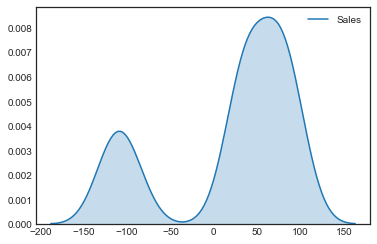

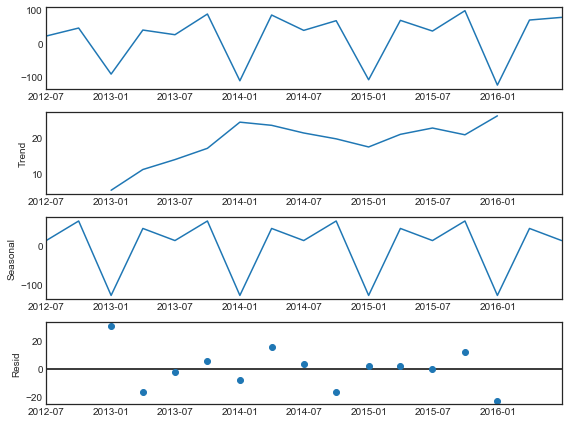

In [5]:
#hide_input

sns.kdeplot(train_d["Sales"], shade=True);

print("- Jarque Bera p-value:", jb(train_d["Sales"])[1].round(2), ", Data is Normal" if jb(train_d)[1] >0.05 else "Not Normal")

print("\n- Mean:", train_d.mean().round(2), ",\n- Std Deviation:", train_d.std().round(2))

plt.rcParams['figure.figsize'] = (8, 6.0)
decomp1 = seasonal_decompose(train_d)

decomp1.plot();


#### Observations
- De-trended data actually shows bi-modal normal distribution. Jarque Bera test confirms normality. 
- The trend is almost flat, except in the first few observations. This actually means we need higher order differencing to remove trend but for the purposes of our analysis, this is good.
- De-trended data has a mean of 20.2 and standard deviation of 77.

###### Transformed Data

Transform the data with z-normalization to make mean 0, std 1 and remove trend component

- Jarque Bera p-value: 0.2 , Data is Normal

- Mean: Sales_X    0.0
dtype: float64 ,
- Std Deviation: Sales_X    1.0
dtype: float64


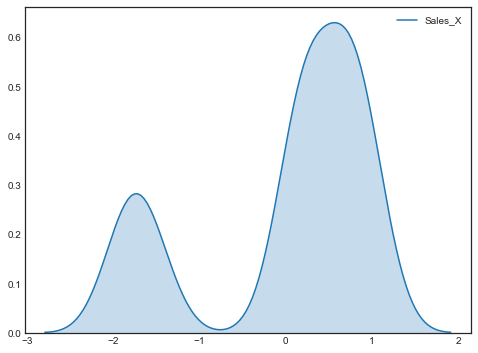

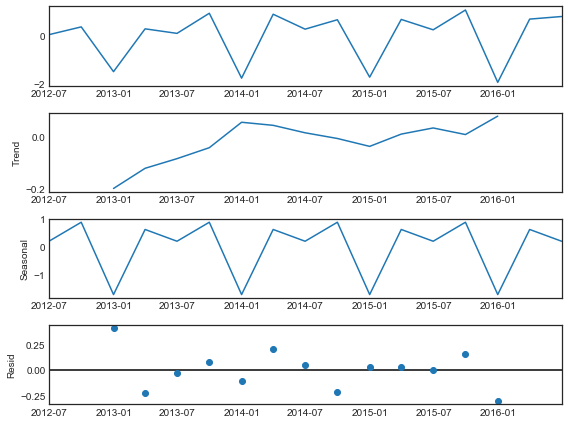

In [6]:
#hide_input
from sklearn import preprocessing

train_X = pd.DataFrame(preprocessing.scale(train_d).flatten(), columns=["Sales_X"])

train_X.set_index(train.index[1:], inplace=True)


sns.kdeplot(train_X["Sales_X"], shade=True);

print("- Jarque Bera p-value:", jb(train_X)[1].round(1), ", Data is Normal" if jb(train_X)[1] >0.05 else "Not Normal")

print("\n- Mean:", train_X.mean().round(1), ",\n- Std Deviation:", train_X.std().round(1))

plt.rcParams['figure.figsize'] = (8, 6.0)
decomp1 = seasonal_decompose(train_X)

decomp1.plot();

  **Observations**
- Transformed data still show the 2 peak bi-modal distribution with a mean of 0 and standard deviation of 1

   
   3. Identify candidate periods from the power spectrum: 
   
   So far we have observed the data in time domain but we can also see it in frequency domain to identify prominent frequencies. It's based on the assumption that it is made up of sine and cosine waves of different frequencies. This helps us detect periodic component of known/unknown frequencies. It can show additional details of the time series that can be easily missed. We do it with a *Periodogram*

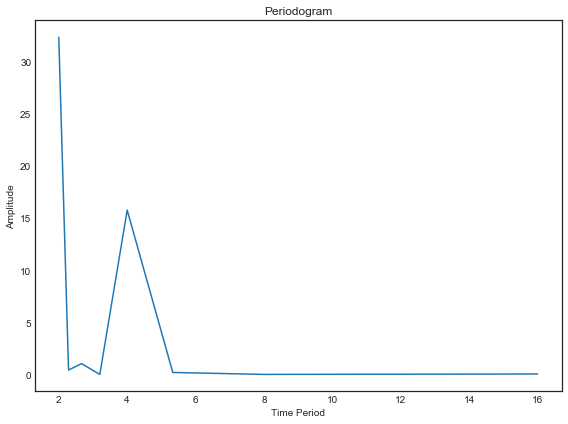

In [7]:
#hide_input
plot_pgram(train_X["Sales_X"],1)

   
   4. Rank candidate periods: 
   
   Pearson and Spearman auto-correlations are computed for the transformed data. Significant lags in auto-correlation are matched with those found in the frequency analysis. If multiple peaks are found, the lags are arranged and peak with the highest correlation value is used for seasonality.
   
   Auto-correlation is the correlation of the time series with its past values. e.g. to calculate the correlation at 1st lag, time series is shifted by 1 observation and correlation is calculated. Process is repeated for many past versions of itself. If auto-correlation is significant at a particular lag value 'k', it shows that the observations from k periods ago affect the time series significantly. You can read more [here](https://otexts.com/fpp2/autocorrelation.html).
   
   In the ACF plot any value that is outside the blue band shows significant lag. As we can see below, only the lag at k=4 is significant (~0.75). This matches with the observation from periodogram.
   
   Thus, Power BI can now confirm that this series has seasonality of 4, phew!. I am glad Power BI does all this automatically and fast.

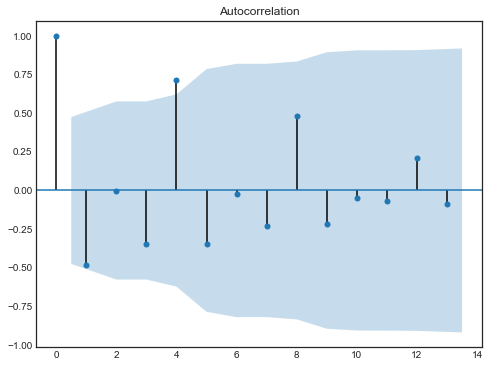

In [8]:
#hide_input
plot_acf(train_X["Sales_X"]);

##### Notes about seasonality:

- Power BI recommends not using very long data as higher order lags have less information and can affect Pearson correlation calculation. Pearson correlation shows linear relationship between two variables. If the data is very log, the linear assumption may not remain valid.
- Power BI recommends at least 3-4 seasons worth of data for seasonality detection to work properly. This means for quarterly data >12 values, >36 for monthly, >156 for weekly data   
- You can also specify the seasonality manually. **I highly recommend entering the seasonality manually** because I have found that automatic seasonality may not always work as intended. I will show an example below. 

I randomly grabbed a monthly time series from the [M3 competition](https://forecasters.org/resources/time-series-data/m3-competition/) dataset. M3 competition dataset is often used in research as a benchmark for testing various forecasting methods. M3 has 3003 time series of various seasonalities. 
For this time series, seasonality = 12 and the goal is to forecast next 12 months. I first created the forecast without specifying the seasonality. As you can see in the clip below, the forecast looks weird and definitely not what you would expect. After specifying seasonality =12, the forecast looks much more reasonable. Reducing the length of the series, as recommended by Power BI, did not help either. Automatic seasonality detection is not as robust as we would like. It's also possible that Power BI's algorithm is thrown off by the sudden peak in year 1985 which could be an outlier. 

>youtube: https://youtu.be/APerQ0i0Z7A

#### Forecasting

To compare the forecasting accuracy, I created a forecast in Power BI based on first 18 values (training set) and forecasted the last 6 values (validation). To be consistent, I entered 4 as seasonality. Table below shows the actual values, forecast, 95% upper and lower CI.  

![Power BI Forecast](https://raw.githubusercontent.com/pawarbi/blog/master/images/fc1.JPG 'Train/Test: 18/6 Split')

In [9]:
#hide_input
pbi_fc1 = pd.read_csv('https://raw.githubusercontent.com/pawarbi/datasets/master/timeseries/pbi_fc1.csv',
                     parse_dates=True, index_col='Date').iloc[-6:]


pbi_fc1["Sales"]=pbi_fc1["Sales"].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

pbi_fc1["Sales"]=pbi_fc1["Sales"].astype('int')

pbi_fc1.round(1)

Sales  forecastValue  confidenceHighBound  confidenceLowBound
Date                                                                     
2016-09-30    773          813.0                864.1               761.8
2016-12-31    592          636.1                689.4               582.9
2017-03-31    627          725.5                797.7               653.4
2017-06-30    725          785.5                873.8               697.1
2017-09-30    854          900.7               1012.3               789.1
2017-12-31    661          702.9                797.0               608.9

##### Forecast Accuracy:

There are many forecast model accuracy metrics. The two most common are RMSE (Root Mean Square Error) and % MAPE (Mean Absolute Percentage Error). You can read more about it in "[Evaluation Metric](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/fbprophet/ensemble_forecast/uncertainty/simulation/2020/04/21/timeseries-part2.html#Evaluation-Metric)" section in Part 2. In general, if the data has no outliers and 0 values, RMSE is a good metric to use. It can be thought of as the avg error in the mean forecast. While there are more robust and scale independent measures that can be used, we will use RMSE for comparing & evaluating the performance. The smaller the RMSE and MAPE the better.

e.g. for Power BI forecast, 
RSME = sqrt (avg[ (773-813)^2 + (592-636.1)^2 + (627-725.5)^2 + (854-900.7)^2 + (661-702)^2)])

![Error_Metric](https://raw.githubusercontent.com/pawarbi/blog/master/images/emetric.JPG "RMSE and %MAPE")

In [10]:
#hide_input
accuracy(pbi_fc1["Sales"], pbi_fc1["forecastValue"])

%MAPE  RMSE
0    8.1  58.9

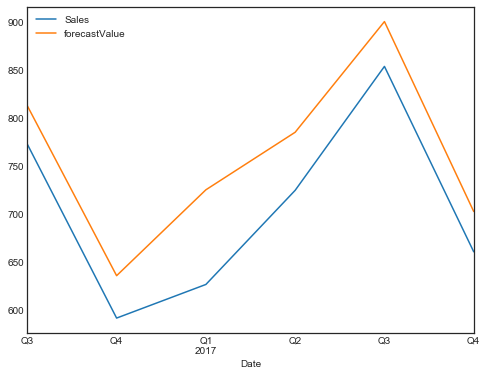

In [11]:
#hide_input
pbi_fc1.iloc[:,:2].plot();

##### Observations:
1. Power BI did an excellent job of capturing the trend and seasonality in the data.
2. Power BI forecast runs parallel to the actual values by almost the same margin, this may indicate some bias in the forecast
3. %MAPE is 8% and RMSE is 59. Thus, Power BI forecast, on average, in +/-8% of actual values or in terms of numbers +/- 59. For comaprison purposes, the standard deviation of the data is 111 so this is a really good forecast. 
4. Actual value is outside the CI band in Q1 2017. I will discuss CI little later in the post,  first we focus on mean forecasts.

##### ETS model in Python

Pyhton (and R) has two implimentations of the exponential smoothing methods. Holt-Winter's (HW) and ETS. ETS has a statistical framework, HW doesnt and HW can be thought of as a subset of ETS. 

For HW in Python, you use `statsmodels.tsa.holtwinters.ExponentialSmoothing()` class and for state space ETS methods you use `statsmodels.tsa.statespace.exponential_smoothing.ExponentialSmoothing()`

In R, for HW use `hw()` and for ETS use `ets()` from forecast library.

>note: In general, although the ETS(AAA) model is equivalent to Holt-Winter's additive linear model, and should give same answers, ETS almost always performs better because of how the parameter initialization and optimization works. You should experiment with HW but ETS more than likely will give more accurate results. 




I will create the ETS(AAA) model in Python.

**ETS(AAA)**

In [12]:
ets1=(sm.tsa.statespace.ExponentialSmoothing( train,    #Using training set , first 18 values)
                                              trend=True, #Trend is present
                                              initialization_method= 'concentrated', 
                                              seasonal=4, #Quarterly data, seasonality=4
                                              damped_trend=False). #Turn of Damped
                                              fit())

py_fc1 = ets1.forecast(6) #forecast next 6 values

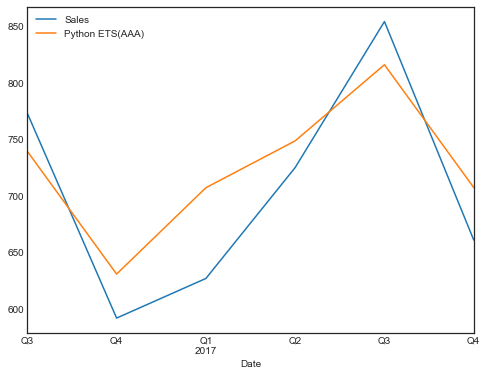

In [13]:
#hide_input
test.plot(label="Test", legend=True)
py_fc1.plot(label="Python ETS(AAA)", legend=True);

In [14]:
#hide_input
accuracy(test["Sales"],ets1.forecast(6))

%MAPE  RMSE
0    6.4  47.0

##### Observations:
1. ETS(AAA) forecast created in Python tracks the actual values much more closely
2. RMSE is 47, smaller than Power BI (58.9). Avg MAPE also better by 2.4 pct (6.4% vs. 8%)


One of the observations I noted earlier was that the trend looks more exponential than linear. The 'additive' trend component can only capture the linear trends and hence not suitable in this case. The more accurate model would be ETS(MAM). Also, if you closely look at the first plot (top of the page) where I plotted the data with 4Q rolling mean, you can clearly see that the orange line is levelling off towards the end. So we not only have an exponential trend it is slowing at the end.

We can make the exponential trend linear by taking a 'log' of the observations and setting `damped_trend=True`. New model is ETS(A,Ad,A)

**ETS(A,Ad,A)**

In [15]:
ets_model=sm.tsa.statespace.ExponentialSmoothing(np.log(train),
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=4, 
                                           damped_trend=True).fit()

py_fc2 = ets_model.get_forecast(6)

results_df=(py_fc2.summary_frame(
            alpha=0.05).apply(
            np.exp)[["mean","mean_ci_lower","mean_ci_upper"]])


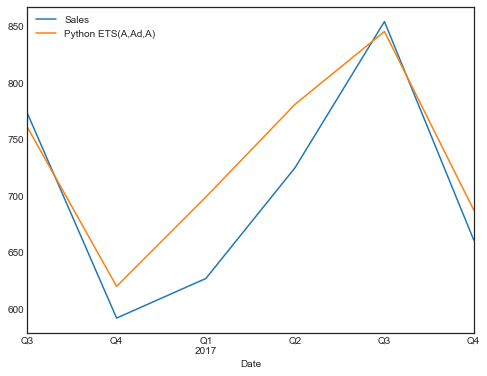

In [16]:
#hide_input
test.plot(label="Test", legend=True)
results_df["mean"].plot(label="Python ETS(A,Ad,A)", legend=True);

In [17]:
#hide_input
accuracy(test["Sales"],results_df["mean"])

%MAPE  RMSE
0    5.1  40.9

##### Observations:
1. ETS(A,Ad,A) matches the actual values even better than the earlier ETS(AAA) model
2. RMSE (40.9) and %MAPE (5%) are better than the ETS(AAA) and Power BI forecast. 

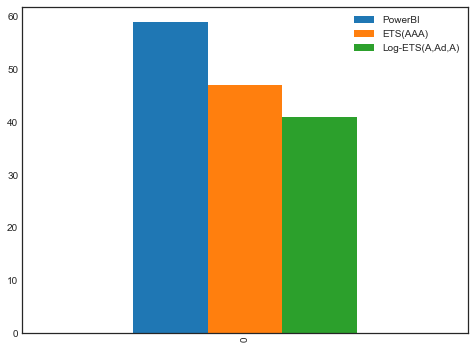

In [41]:
#hide_input
_res = pd.DataFrame({'PowerBI': 58.9, "ETS(AAA)": 47, "Log-ETS(A,Ad,A)": 40.9}, index=[0])
_res.plot.bar();

##### Recommendations

The main-take away from the above exercise is that Power BI can create fairly accurate forecasts but has limitations:
1. The trend and seasonal components have to be linear. If you have exponential and/or damped trend, you may not get accurate results
2. Automatic detection of seasonality can be spotty. It's best to manually enter the seasoanlity in the Forecast dialog box in Power BI
3. Power BI uses two ETS models (AAN) and (AAA). It chooses the method based on its own algorithm.
4. ETS method has its own limitations. While it can be more robust to outliers compared to ARIMA, location of the outlier (close to the end of the series vs earlier) can throw off the forecast. Power BI detects outliers by monitoring local trend and automatically adjusting forecast accordingly.
5. ETS cannot be used for high frequency time series such as daily, sub-daily (minute, hourly) data. In fact, weekly data is also pushing the envelope a little bit. The reason for that is in high-frequency data such as weekly you may have multiple seasonalities. For example, if you have weekly sales data, it's possible that sales may be higher closer to month end ('week of the month'), plus some months may have higher sales than other ('month of year' seasonality). We cannot enter mutiple seasonality values. Thus **do not use Power BI forecast for anything other than monthly, quarterly, semi-annual, yearly data**, you can use weekly data but with caution. If you have high frequency data you will need to try TBATS, deep-learning, Facebook Prophet models (see part 2). If you do use Power BI forecast for high-frequency data, it will likley use the (AAN) model and give you a straight line with a trend. 
6. Use data with at least 3-4 full seasonal cycles. That translates to >36 for monthly, 12 for quarterly data.
7. Do not use too much data. While Power BI doesn't mention what's too much, I would recommend using only the relevant 5 cycle data if available. 
8. Power BI does not provide model evaluation metric. You can 'estimate' the model accuracy by the method described above. Let's say your forecast horizon is 12 months. Enter 12 in the 'Ignore Last' and create a forecast for 12 months. Use the RSME & %MAPE to evaluate the forecast accuracy. While it doesn't guarantee true forecast accuracy, it at least gives you an estimation. If you don't have enough data, use the Cross-Validation approach I described in [Part 2](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/fbprophet/ensemble_forecast/uncertainty/simulation/2020/04/21/timeseries-part2.html#Cross-Validation)
9. Power BI imputes missing values by linear iterpolation. If your data has non-linear trend, too many missing values (>40%), missing values close to the end of the time series, it's better to clean up the data yourself than letting Power BI do it automatically. 
10. If your data has many 0's (no sales, no production etc) which is usually the case for new products or slow moving products (i.e intermittent demand), do not use Power BI forecast. ETS should not be used for intermittent time series. Croston's method, deep-learning models can be used in that case. 
11. ETS cannot use additional variables (exogenous variables) to improve the forecast. For example, if you sell more products when it's sunny, warm outside, on weekends, holidays, sport events etc. If the time series has high correlation with such events, you can include them in the forecast model for better accuracy. SARIMAX, deep-learning, gradient boosting models can be used for that. AutoML in Azure ML has built in holiday calendar and can include all these variables in the forecast.  
12. An important and essential part of any statistical/machine learning model is model diagnostics. We want to make sure the model is valid, accurate, doesn't overfit and has extracted all the information from the available data. It is usually done by residual diagnsotics. Power BI doesn't provide any model diagnostics or parameter values etc. I am going to skip that part here but you can read more in Part 2.


### Forecast Uncertainty, Confidence Interval or Prediction Interval

The forecast we obtain in Power BI is the mean forecast. Time series is a statistical process and thus has probability distribution. When we create a forecast, we are estimating the mean of that forecast distribution, i.e 50% probability values. What about the other percentiles? 

Power BI lets you choose the **Confidence Interval (CI)**. You can choose from 75%, 80%, 85%, 95%, 99%. The 2014 blog talks about using confidence interval for assessing forecast accuracy. 

*'...The shaded area shows you the range of predicted values at different confidence levels...'*

I think Power BI is calculating the **Prediction Interval (PI)** based on above description and not CI. You are actually choosing the confidence values for the PI. Let me explain the difference between the two and why it is important. 


When you calculate CI, you are creating a confidence interval around the **mean forecast**. For example, the first mean forecast above is 813, upper bound is 864 and lower bound is 762. If it is CI, it does not mean the forecast will be between 864 and 762, 95% of the time. What it means is that based on the optimized parameters used in the model, limited sample size etc., **the mean** will be between 864 and 761. It's the error in estimating the mean.
It's true that the band gives you an estimation of the range of mean values but it's not the range of the **predicted values** if it is CI. Prediction intervals (PI) are wider than CI. CI's are used to estimate error in a parameter of the population , e.g. mean, median, percentile, even PI values. It's not a range of predicted values. 

I will give you an example, let' say you work in an office where 1000 people work and you are asked what's the average work experience in years for the company. You go and ask 25 people about their years of experience, take an average and come up with 12.5 and standard dev of 2.3. Because you only asked 25 people, you know there is an error. You can [estimate that error](https://www.mathsisfun.com/data/confidence-interval-calculator.html) using CI and it is [11.6, 13.4] at 95%. This means the "mean" will be between 11.6 and 13.4 95% of the time but the actual **"range"** of experience would be far greater depending on the distribution. You might have people with 1 month experience to 30+ years experience, that's PI. Note that PI can be close to CI but not always. CI doesn't take model uncertainty into account and has little to no value in practical forecasting.

![CI](https://raw.githubusercontent.com/pawarbi/blog/master/images/ci.JPG "Confidence Interval")

Based on the 1 line description in the blog and the tests I have done, I think Power BI is calculating the PI, at least I hope so. This is why Power BI should release more documentation on this topic.

**How is PI calculated?**

[Hyndman](https://otexts.com/fpp2/ets-forecasting.html) has provided calculations for estimating the PI. It assumes the residuals are normal, which may not always be the case. Simulations can be used for better results as it doesn't assume distribution of the residuals. I [calculated the PI](https://pawarbi.github.io/blog/forecasting/r/python/rpy2/altair/fbprophet/ensemble_forecast/uncertainty/simulation/2020/04/21/timeseries-part2.html#Confidence-Interval-vs.-Prediction-Interval) using simulation in Part 2  as [923, 691] which is slightly wider than the CI from Power BI [864,762].

Also note that the PI & CI grow with the forecast horizon. The farther you are into the future, the more uncertainty you have in the estimates.

Below I calculated the PI using R. As you can see they are slightly wider than Power BI's range but close. 

In [18]:

%%R -i train -o fets

library(fpp2)

r_train <- ts(train$Sales, start=c(2012,01), frequency=4)

fets <- r_train %>% ets() %>% forecast(h=6, simulate=TRUE, level= 95) %>% summary()

In [19]:
#hide_input

fets.round(1)

Point Forecast  Lo 95   Hi 95
0           799.7  733.7   863.9
1           631.1  563.9   702.3
2           724.0  635.9   821.3
3           771.0  665.4   883.7
4           878.5  745.6  1023.9
5           691.8  578.6   817.8

#### Implementation in Power BI with Python

Power BI created a reasonable forecast but it can be improved. If you want to further improve this forecast, you can use the "Ensemble Forecast" discussed in Part 2. 

Perhaps the biggest limitation of forecasting in Power BI is not being able to access the forecast values for further calculations or reporting. It doesn't even show the forecast on the line chart.

We can use this Python code in Power BI for forecasting. Watch the video below. I [have uploaded this Power BI](https://github.com/pawarbi/datasets/blob/master/powerbi_forecast.pbix) file to my Github for your reference.

You need statsmodels, numpy, pandas libraries installed.


In [20]:
#hide_output
# 'dataset' holds the input data for this script

import numpy as np

from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

h = 4 #forecast horizon

model=ExponentialSmoothing(np.log(dataset["Sales"]),trend=True,initialization_method= 'heuristic',seasonal=4,damped_trend=True).fit()

fc=np.exp(model.predict(0,len(dataset)+(h-1)))

dates=pandas.date_range(start='2012-03-31', periods= len(dataset)+h , freq='Q')

df=pandas.DataFrame({'dates':dates,'Actual':dataset["Sales"],'Forecast':fc})  

NameError: name 'dataset' is not defined

We are using the same Python model we used earlier but we have to create a new dataframe for the additional values created by the forecast. Note that in this case, I am also obtaining the fittedvalues to inspect the fit over the data. If you only care about the forecast, change the code to `model.forecast(4)`



DAX for extracting forecast Sales

In [3]:
%%html
Forecast_Sales&nbsp;=<br><span class="Keyword" style="color:#035aca">CALCULATE</span><span class="Parenthesis" style="color:#808080">&nbsp;(</span>&nbsp;<span class="Keyword" style="color:#035aca">VALUES</span><span class="Parenthesis" style="color:#808080">&nbsp;(</span>&nbsp;forecast[Forecast]&nbsp;<span class="Parenthesis" style="color:#808080">)</span>,&nbsp;forecast[type]&nbsp;==&nbsp;<span class="StringLiteral" style="color:#D93124">"Forecast"</span>&nbsp;<span class="Parenthesis" style="color:#808080">)</span><br>

>note: If you have not installed or used Python in Power BI before, read the [documentation first](https://docs.microsoft.com/en-us/power-bi/desktop-python-scripts). Also read these [performance tips](https://dataveld.com/2018/11/10/5-performance-tips-for-r-and-python-scripts-in-power-bi/) by [David Eldersveld](https://twitter.com/dataveld)

>tip: I recommend creating virtual environments and using (e.g. pynenv) for Power BI specific virtual environment

>youtube: https://youtu.be/mSqkXO2LJH4

##### Python in Power BI Limitations:
1. If you are not familiar with Python or don't have access to Python at work, this obvisouly won't work for you
2. For Python scripts to work properly in *Power BI service*, all data sources need to be set to "Public". That's a BIG NO.
3. If you use Pyhon script in Power Query, you have to use a personal gateway. That may not be a problem but if you are using dataflow in your report, this solution won't work as dataflow needs Enterprise Gateway
4. Python script cannot be used on merged queries, you will get an error. You can merge after the Python script but not before.
5. The `exponential_smoothing()` can resturn confidence interval (see Part 2) but as we discussed above, it's of no practical use. It does not calculate prediction interval. We can use simulation to get prediction interval but it takes few minutes so can't practially be used as a Python script in Power BI. 

#### Using R in Power BI

[Leila Etaati](https://twitter.com/leila_etaati) has covered [forecasting using R](https://radacad.com/new-series-of-time-series-part-3-holts-exponential-smoothing) in great details, so I won't cover it here. But personally I find the `forecast()`, `fpp2()`, `fable()` libraries in R to be much faster, easier to work with and they do return prediction interval. Plus, unlike Python,`ets()` can be used for "multiplicative" models.

#### Using Excel

 Excel has `FORECAST.ETS()` formula which uses ETS(AAA) method to create the forecast, just like Power BI. Power BI could be using the same algorithm under the hood because the options and results are very identical. Forecast Sheet under "Data" can be used for creating forecast with a UI. You can import this excel in Power BI and create a line chart  almost exactly same as Power BI.
 
ETS can't be used for high-frequency data anyway so you would only need to update the Excel sheet once a month, quarter, year etc. so it shouldn't be a big problem. You can also use Power Automate to refresh the Excel on a schedule.  
 
 If you are ok with the limitations of ETS(AAA) model discussed above or find that ETS(AAA) can produce accurate results for your data, I think this is the easiest method to show forecast in Power BI. 

>youtube: https://youtu.be/xptayIU4FeY

### Other Options

**SQL**: If you are using SQL as a datasource, you can use RevoScalePy/RevoScaleR in SQL to serve any machine learning model including forecasting 

**KNIME**: [KNIME](https://www.knime.com/) is an open-source tool used for productionizing data science projects. It's free, easy to use, can be used for ETL and the best part is that it has a Power BI integration. You can create a forecasting model (it's own ETS, ARIMA nodes or R/Python) and push the results to Power BI. If you need a more complex model, this is a great option. I will cover this in a future blog post.  

**Azure ML**: Azure ML Service has a direct integration with Power BI. You can create the model in Azure Notebook, Designer or AutoML. You can see an example [here](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-auto-train-forecast). In the next blog I will cover this in more detail.   

**Custom Visuals**: There are some [custom visuals](https://appsource.microsoft.com/en-us/marketplace/apps?product=power-bi-visuals&page=1&category=time) in the Apps gallery but I generally never use custom visuals for data privacy and dependency reasons.

## Summary  

1. It's easy to create a forecast in Power BI but it is severely limited
2. You cannot show the forecasted values on the line chart
3. You do not know what preprocessing Power BI may have applied to the data (imputation, outlier removal etc.)
4. You cannot plot multiple columns or use second Y axis when Forecast is used
5. You cannot use the 'Legend' in the line chart with Forecast. Only works in Line Chart and not in 'Line & Stacked column chart'
6. You cannot extract the forecasted values for use in measures or calculated columns
7. Forecast can be exported as an excel file, re-imported to use the forecast but that would defeat the purpose of automatic forecasting
8. Power BI uses two ETS methods (AAN) and (AAA) which can be used for additive components but not when the trend, seasonality are non-linear
9. Power BI forecast should not be used on high-frequency data such as daily, hourly (even weekly if it exhibits multiple seasonalities)
10. Use at least data worth 3-4 seasons (>12 for quarterly, >36 for monthly data)
11. Power BI should provide more documentation on confidence interval and clarify if it is confidence interval or prediction interval. Until then, use it with caution.
12. If you do use Power BI's forecast tool, create a forecast first for time greater than or equal to your forecast horizon, use the same number in the 'Ignore Last' points, assess the fit and calculate RMSE. If the fit looks good, you can use it for final forecast.
13. Always enter the seasonality manually 
14. Do not use Power BI forecast on intermittent data with several 0's.
15. Excel might provide the easiest way to create an ETS(AAA) forecast. But has the same limitations as discussed above for ETS in general. 
16. You can use Pyhton and R for generating forecasts in and outside of Power BI. R can give mean forecast and the prediction interval. For Pyhton, use simulations to generate PI. 

## References:

   1. Forecasting: Principles and Practice, by Prof. Hyndman
   2. Time Series Analysis and its Applications, by Robert Shumway
   3. Time Series Analysis and Forecasting, by Montgomery  & Jennings
   4. Introduction to Time Series and Analysis, by Brockwell
   5. Practial Time Series Forecasting with R, by Galit Shmueli   6. https://homepage.univie.ac.at/robert.kunst/pres09_prog_turyna_hrdina.pdf